In [43]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def round0(x):
  return round(x, 0)

with tf.device('/cpu:0'):
    model = tf.keras.models.load_model('saved_model224/saved_model/my_model')
    image_ori = cv2.resize(cv2.imread('saved.png'), (640, 480))
    print('shape:', image_ori.shape)
    
    
    image = np.copy(image_ori)

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image_height, image_width, _ = image.shape
    image = cv2.resize(image, (224, 224))
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image1 = tf.cast(image, tf.float32) / 255.0
    prediction_confidences = model.predict(image1[tf.newaxis, ...], verbose=0)
    prediction = np.array(tf.keras.utils.array_to_img(create_mask(prediction_confidences)))
    # prediction[prediction!=0]=255
    prediction_size = cv2.resize(prediction, (640, 480))
    image_ori[prediction_size==0] = np.array([255,255,255], dtype=np.uint8)
    # prediction_gray = np.copy(prediction)
    # prediction_bgr = cv2.cvtColor(prediction, cv2.COLOR_GRAY2BGR)
    # print(np.unique(prediction_bgr))
    # image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    merged_image = np.concatenate((image_ori, cv2.resize(cv2.cvtColor(prediction, cv2.COLOR_GRAY2BGR), (640, 480))), axis=1)
    
    # print(prediction)
    # merged_image = np.concatenate((cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), prediction), axis=0)
    # Flip the image horizontally for a selfie-view display.
    # merged_image = cv2.resize(merged_image, image_ori.shape[:2])
    # cv2.imshow('Mouth segmentation', cv2.flip(merged_image, 1))
    





shape: (480, 640, 3)


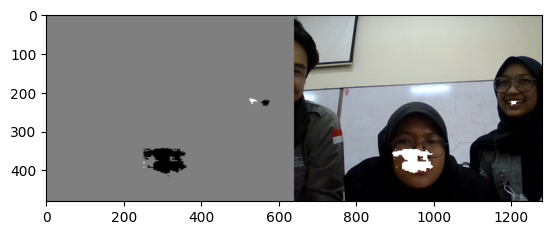

In [44]:
plt.imshow(cv2.cvtColor(cv2.flip(merged_image, 1), cv2.COLOR_BGR2RGB))

In [45]:
prediction_confidences

array([[[[-1.5243864 ,  2.4727159 ,  0.2706341 ],
         [-3.156342  ,  2.0712554 , -0.42807865],
         [-2.3535154 ,  3.3130612 ,  1.0784217 ],
         ...,
         [-5.051516  ,  3.7118716 , -2.159774  ],
         [-4.502745  ,  4.4792747 , -0.05496953],
         [-4.8254104 ,  3.136744  , -1.332244  ]],

        [[-3.6950848 ,  2.7799299 ,  0.27251542],
         [-4.140433  ,  3.3139784 , -0.48993483],
         [-3.2812407 ,  4.4215245 ,  0.11074003],
         ...,
         [-5.094181  ,  5.9093847 , -2.0092359 ],
         [-4.669097  ,  7.3943396 , -0.05378238],
         [-5.496642  ,  4.624511  , -1.717551  ]],

        [[-5.620152  ,  1.5859197 , -0.77304924],
         [-4.393117  ,  3.534155  , -0.61709106],
         [-3.6132472 ,  2.5726528 , -2.1583605 ],
         ...,
         [-5.6322207 ,  5.092675  , -3.7510393 ],
         [-7.0886235 ,  4.613747  , -2.091496  ],
         [-5.446363  ,  4.920063  , -1.8494151 ]],

        ...,

        [[-4.3804584 ,  3.4644256 , -0

In [46]:
tf.math.argmax(prediction_confidences, axis=-1)[0][0]

<tf.Tensor: shape=(224,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)>

In [47]:
filter_confidences = np.copy(prediction_confidences)
filter_confidences[(filter_confidences>0) & (filter_confidences<0.5)] = -np.inf

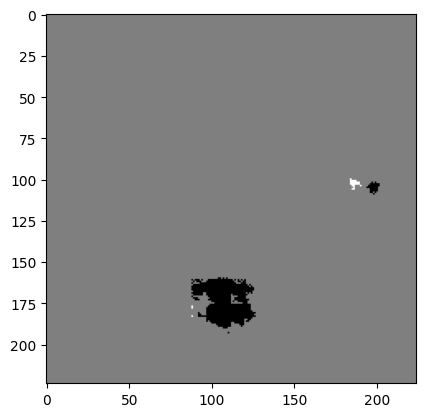

In [48]:
pred_confs = np.array(tf.keras.utils.array_to_img(create_mask(prediction_confidences)))
plt.imshow(cv2.cvtColor(cv2.flip(pred_confs, 1), cv2.COLOR_BGR2RGB))

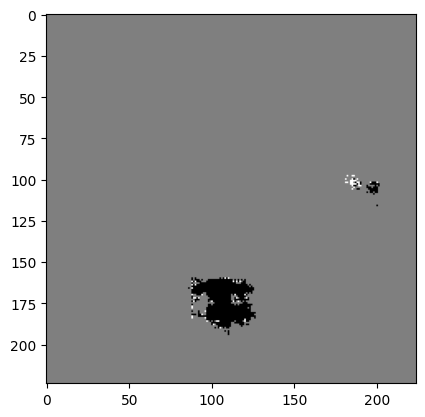

In [49]:
filter_confs = np.array(tf.keras.utils.array_to_img(create_mask(filter_confidences)))
plt.imshow(cv2.cvtColor(cv2.flip(filter_confs, 1), cv2.COLOR_BGR2RGB))